In [1]:
# Load essentials
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Load shapefile
fp = 'Local_Authority_Districts_December_2017_Super_Generalised_Clipped_Boundaries_in_Great_Britain.shp'

map_df = gpd.read_file(fp)

In [3]:
map_df.head()

,objectid,lad17cd,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry
0,1,E06000001,Hartlepool,None,447157,531476,-1.27023,54.676159,9.365265e+07,59467.502291,"POLYGON ((447851.2015000004 537036.0043000001,..."
1,2,E06000002,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.410254e+07,38474.532954,(POLYGON ((450791.1017000005 520932.5039000008...
2,3,E06000003,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.447601e+08,90579.304692,(POLYGON ((456987.1991999997 526324.9002999999...
3,4,E06000004,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.043652e+08,102708.184772,"POLYGON ((445397.8010999998 526934.3958999999,..."
4,5,E06000005,Darlington,None,428029,515649,-1.56835,54.535351,1.977901e+08,97801.401117,"POLYGON ((423240.1971000005 524970.8979000002,..."


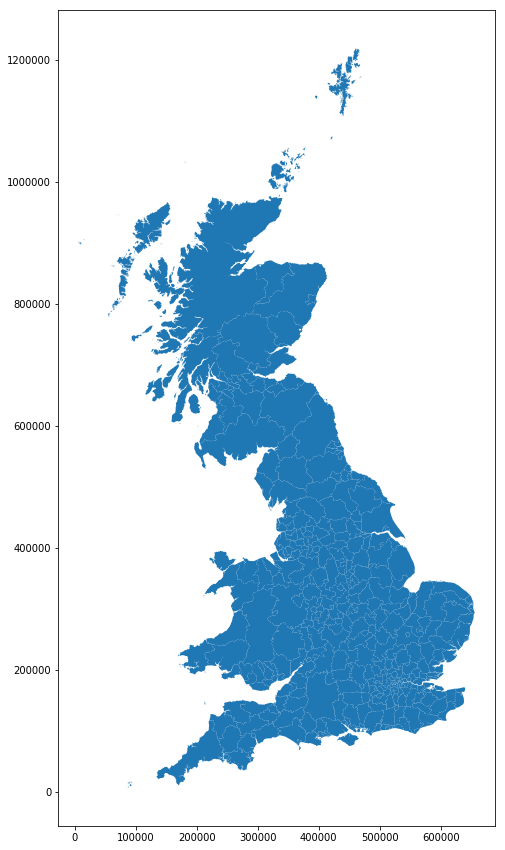

In [4]:
map_df.plot(figsize = (15, 15))

In [5]:
# Load main dataset (including LA codes)
df = pd.read_csv('16_19_data_with_local_auth.zip',
                 compression = 'zip',
                 low_memory = False)

df.head(5)

,age_range,datetime,gender,involved_person,legislation,object_of_search,officer_defined_ethnicity,operation,operation_name,outcome,...,self_defined_ethnicity,type,Force,latitude,street_name,street_id,longitude,outcome_object_id,outcome_object_name,nearest_local_auth
0,18-24,2016-07-01T03:36:40+00:00,Female,True,Misuse of Drugs Act 1971 (section 23),Controlled drugs,White,False,NaN,Suspect summonsed to court,...,White - White British (W1),Person search,avon-and-somerset,51.472770,On or near The Avenue,545646.0,-2.633822,summonsed,Suspect summonsed to court,E06000023
1,18-24,2016-07-01T03:36:40+00:00,Female,True,Misuse of Drugs Act 1971 (section 23),Controlled drugs,White,False,NaN,False,...,White - White British (W1),Person search,avon-and-somerset,51.472770,On or near The Avenue,545646.0,-2.633822,nothing,Nothing found - No further action,E06000023
2,18-24,2016-07-01T03:36:40+00:00,Female,True,Misuse of Drugs Act 1971 (section 23),Controlled drugs,White,False,NaN,False,...,White - White British (W1),Person search,avon-and-somerset,51.472770,On or near The Avenue,545646.0,-2.633822,nothing,Nothing found - No further action,E06000023
3,10-17,2016-07-01T05:20:55+00:00,Male,True,Police and Criminal Evidence Act 1984 (section 1),Articles for use in criminal damage,White,False,NaN,False,...,White - White British (W1),Person search,avon-and-somerset,51.013992,On or near Shopping Area,530193.0,-3.101950,nothing,Nothing found - No further action,E07000190
4,25-34,2016-07-01T07:21:51+00:00,Male,True,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Other,False,NaN,False,...,Not Stated (NS),Person search,avon-and-somerset,51.080631,On or near West Lane,531254.0,-2.612072,nothing,Nothing found - No further action,E07000187


In [6]:
# Define 'failure' and 'success' columns
df['failure'] = df.loc[:,'outcome'].isin(['A no further action disposal', 'False']).astype(float)
df['success'] = df.loc[:,'outcome'].isin(['Suspect arrested',
                                          'Arrest',
                                          'Offender given drugs possession warning',
                                          'Khat or Cannabis warning',
                                          'Local resolution',
                                          'Article found - Detailed outcome unavailable',
                                          'Summons / charged by post',
                                          'Penalty Notice for Disorder',
                                          'Offender given penalty notice',
                                          'Caution (simple or conditional)',
                                          'Offender cautioned',
                                          'Suspected psychoactive substances seized - No further action']).astype(float)

# Aggregate observations by Local Authority code and calculate percentage of failures / successes respectively
df_outcomes = pd.pivot_table(df, values = ['failure', 'success'], index = 'nearest_local_auth', aggfunc = np.sum)
df_outcomes['total'] = df_outcomes.sum(axis = 1)
df_outcomes['proportion_failure'] = (df_outcomes['failure'] / df_outcomes['total']) * 100
df_outcomes['proportion_success'] = (df_outcomes['success'] / df_outcomes['total']) * 100
df_outcomes.head()

,failure,success,total,proportion_failure,proportion_success
nearest_local_auth,,,,,
E06000001,342.0,157.0,499.0,68.537074,31.462926
E06000002,609.0,298.0,907.0,67.144432,32.855568
E06000003,113.0,65.0,178.0,63.483146,36.516854
E06000004,298.0,182.0,480.0,62.083333,37.916667
E06000005,1191.0,651.0,1842.0,64.657980,35.342020


In [7]:
# Quick testing / inspection – compare with official maps to make sure that LA codes and areas correspond
df_outcomes.loc['E07000044', 'proportion_success'] == 100.0
df_outcomes.loc['E09000023']

failure                7625.000000
success                3448.000000
total                 11073.000000
proportion_failure       68.861194
proportion_success       31.138806
Name: E09000023, dtype: float64

In [8]:
# Join GeoDataFrame with outcome dataset
merged = map_df.set_index('lad17cd').join(df_outcomes, how = 'inner')
merged.head()

,objectid,lad17nm,lad17nmw,bng_e,bng_n,long,lat,st_areasha,st_lengths,geometry,failure,success,total,proportion_failure,proportion_success
E06000001,1,Hartlepool,None,447157,531476,-1.27023,54.676159,9.365265e+07,59467.502291,"POLYGON ((447851.2015000004 537036.0043000001,...",342.0,157.0,499.0,68.537074,31.462926
E06000002,2,Middlesbrough,None,451141,516887,-1.21099,54.544670,5.410254e+07,38474.532954,(POLYGON ((450791.1017000005 520932.5039000008...,609.0,298.0,907.0,67.144432,32.855568
E06000003,3,Redcar and Cleveland,None,464359,519597,-1.00611,54.567520,2.447601e+08,90579.304692,(POLYGON ((456987.1991999997 526324.9002999999...,113.0,65.0,178.0,63.483146,36.516854
E06000004,4,Stockton-on-Tees,None,444937,518183,-1.30669,54.556911,2.043652e+08,102708.184772,"POLYGON ((445397.8010999998 526934.3958999999,...",298.0,182.0,480.0,62.083333,37.916667
E06000005,5,Darlington,None,428029,515649,-1.56835,54.535351,1.977901e+08,97801.401117,"POLYGON ((423240.1971000005 524970.8979000002,...",1191.0,651.0,1842.0,64.657980,35.342020


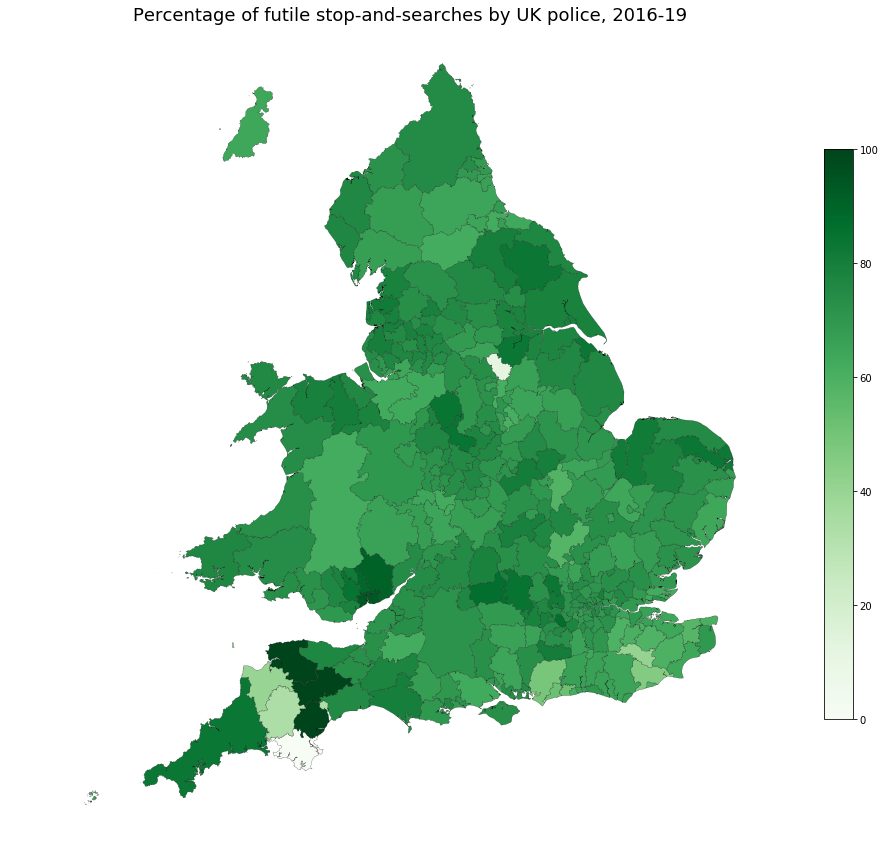

In [9]:
# Variable to plot
variable = 'proportion_failure'

# Choropleth min / max
vmin, vmax = 0, 100

# Set up figure and axes
fig, ax = plt.subplots(1, figsize = (20, 15))

# Create map
merged.plot(column = variable,
            cmap = 'Greens',
            linewidth = 0.2,
            ax = ax,
            edgecolor = '0')

# remove axis and add title
ax.axis('off')

ax.set_title('Percentage of futile stop-and-searches by UK police, 2016-19',
             fontdict = {'fontsize': '18',
                         'fontweight' : '3'})

# Set up colorbar
sm = plt.cm.ScalarMappable(cmap = 'Greens',
                           norm = plt.Normalize(vmin = vmin, vmax = vmax))
sm._A = []
cbar = fig.colorbar(sm, shrink = 0.7)

# Save map
fig.savefig('percentage_futile_searches_entire_UK.png', dpi = 300)